In [35]:
from sympy import symbols, exp,diff, solve, zeros, Determinant, I

In [36]:
k, y, alpha_w,alpha_s,beta_s = symbols('k y alpha_w alpha_s beta_s')
c1, c2, c3, c4, c5, c6 = symbols('c1 c2 c3 c4 c5 c6')
lambda_w, lambda_s, mu_s, mu_w = symbols('lambda_w lambda_s mu_s mu_w')
H_w, H_s = symbols('H_w H_s')

In [78]:
phi_w  = c1*exp(-alpha_w*k*y) + c2*exp(alpha_w*k*y)
phi_s  = c3*exp(-alpha_s*k*y) + c4*exp(alpha_s*k*y)
psi_s  = c5*exp(-beta_s*k*y)  + c6*exp(beta_s*k*y)

In [79]:
ux_w = -I*k*phi_w
uy_w = diff(phi_w,y)
ux_s = -I*k*phi_s + diff(psi_s,y)
uy_s = diff(phi_s,y) + I*k*psi_s

In [80]:
tauyy_w = lambda_w*( (-I*k)*ux_w + diff(uy_w,y))
tauxy_w = mu_w*(diff(ux_w,y) - I*k*uy_w)

In [81]:
eqn=[]
eqn.append( ux_s.subs(y,H_s) ) 
eqn.append( uy_s.subs(y,H_s) )
eqn.append( ux_s.subs(y,H_w) - ux_w.subs(y,H_w) )
eqn.append( uy_s.subs(y,H_w) - uy_w.subs(y,H_w) )
eqn.append( tauyy_w.subs(y,0) )
eqn.append( tauxy_w.subs(y,0) )

In [82]:
C = zeros(6, 6)
for i in range(6):
    for j,s in enumerate(('100000','010000','001000','000100','000010','000001')):
        C[i,j]= eqn[i].subs(c1,s[0]).subs(c2,s[1]).subs(c3,s[2])\
                        .subs(c4,s[3]).subs(c5,s[4]).subs(c6,s[5])

In [83]:
C

Matrix([
[                                0,                                 0,       -I*k*exp(-H_s*alpha_s*k),      -I*k*exp(H_s*alpha_s*k), -beta_s*k*exp(-H_s*beta_s*k), beta_s*k*exp(H_s*beta_s*k)],
[                                0,                                 0, -alpha_s*k*exp(-H_s*alpha_s*k), alpha_s*k*exp(H_s*alpha_s*k),       I*k*exp(-H_s*beta_s*k),      I*k*exp(H_s*beta_s*k)],
[          I*k*exp(-H_w*alpha_w*k),            I*k*exp(H_w*alpha_w*k),       -I*k*exp(-H_w*alpha_s*k),      -I*k*exp(H_w*alpha_s*k), -beta_s*k*exp(-H_w*beta_s*k), beta_s*k*exp(H_w*beta_s*k)],
[    alpha_w*k*exp(-H_w*alpha_w*k),     -alpha_w*k*exp(H_w*alpha_w*k), -alpha_s*k*exp(-H_w*alpha_s*k), alpha_s*k*exp(H_w*alpha_s*k),       I*k*exp(-H_w*beta_s*k),      I*k*exp(H_w*beta_s*k)],
[lambda_w*(alpha_w**2*k**2 - k**2), lambda_w*(alpha_w**2*k**2 - k**2),                              0,                            0,                            0,                          0],
[            2*I*alpha_w*k**2*m

In [84]:
C[4,:] = C.row(4)/ C[4,0]
C[5,:] = C.row(5)/ C[5,0]

In [85]:
C

Matrix([
[                            0,                             0,       -I*k*exp(-H_s*alpha_s*k),      -I*k*exp(H_s*alpha_s*k), -beta_s*k*exp(-H_s*beta_s*k), beta_s*k*exp(H_s*beta_s*k)],
[                            0,                             0, -alpha_s*k*exp(-H_s*alpha_s*k), alpha_s*k*exp(H_s*alpha_s*k),       I*k*exp(-H_s*beta_s*k),      I*k*exp(H_s*beta_s*k)],
[      I*k*exp(-H_w*alpha_w*k),        I*k*exp(H_w*alpha_w*k),       -I*k*exp(-H_w*alpha_s*k),      -I*k*exp(H_w*alpha_s*k), -beta_s*k*exp(-H_w*beta_s*k), beta_s*k*exp(H_w*beta_s*k)],
[alpha_w*k*exp(-H_w*alpha_w*k), -alpha_w*k*exp(H_w*alpha_w*k), -alpha_s*k*exp(-H_w*alpha_s*k), alpha_s*k*exp(H_w*alpha_s*k),       I*k*exp(-H_w*beta_s*k),      I*k*exp(H_w*beta_s*k)],
[                            1,                             1,                              0,                            0,                            0,                          0],
[                            1,                            -1,         

In [312]:
characteristic = C.det()
characteristic

2*alpha_s**2*beta_s**2*k**4*exp(H_s*alpha_s*k)*exp(H_s*beta_s*k)*exp(-H_w*alpha_s*k)*exp(-H_w*beta_s*k) - 2*alpha_s**2*beta_s**2*k**4*exp(H_s*alpha_s*k)*exp(-H_s*beta_s*k)*exp(-H_w*alpha_s*k)*exp(H_w*beta_s*k) - 2*alpha_s**2*beta_s**2*k**4*exp(-H_s*alpha_s*k)*exp(H_s*beta_s*k)*exp(H_w*alpha_s*k)*exp(-H_w*beta_s*k) + 2*alpha_s**2*beta_s**2*k**4*exp(-H_s*alpha_s*k)*exp(-H_s*beta_s*k)*exp(H_w*alpha_s*k)*exp(H_w*beta_s*k) - 4*alpha_s*beta_s*k**4*exp(H_s*alpha_s*k)*exp(H_s*beta_s*k)*exp(-H_w*alpha_s*k)*exp(-H_w*beta_s*k) - 4*alpha_s*beta_s*k**4*exp(H_s*alpha_s*k)*exp(-H_s*beta_s*k)*exp(-H_w*alpha_s*k)*exp(H_w*beta_s*k) + 16*alpha_s*beta_s*k**4 - 4*alpha_s*beta_s*k**4*exp(-H_s*alpha_s*k)*exp(H_s*beta_s*k)*exp(H_w*alpha_s*k)*exp(-H_w*beta_s*k) - 4*alpha_s*beta_s*k**4*exp(-H_s*alpha_s*k)*exp(-H_s*beta_s*k)*exp(H_w*alpha_s*k)*exp(H_w*beta_s*k) + 2*k**4*exp(H_s*alpha_s*k)*exp(H_s*beta_s*k)*exp(-H_w*alpha_s*k)*exp(-H_w*beta_s*k) - 2*k**4*exp(H_s*alpha_s*k)*exp(-H_s*beta_s*k)*exp(-H_w*alpha_s*k)*e

In [87]:
characteristic_simplified = characteristic.subs(alpha_s,1).subs(alpha_w,1).factor()
characteristic_simplified

2*k**4*(beta_s*exp(H_s*k)*exp(H_s*beta_s*k) - beta_s*exp(H_s*k)*exp(H_w*beta_s*k) + beta_s*exp(H_w*k)*exp(H_s*beta_s*k) - beta_s*exp(H_w*k)*exp(H_w*beta_s*k) - exp(H_s*k)*exp(H_s*beta_s*k) - exp(H_s*k)*exp(H_w*beta_s*k) + exp(H_w*k)*exp(H_s*beta_s*k) + exp(H_w*k)*exp(H_w*beta_s*k))*(beta_s*exp(H_s*k)*exp(H_s*beta_s*k) + beta_s*exp(H_s*k)*exp(H_w*beta_s*k) - beta_s*exp(H_w*k)*exp(H_s*beta_s*k) - beta_s*exp(H_w*k)*exp(H_w*beta_s*k) - exp(H_s*k)*exp(H_s*beta_s*k) + exp(H_s*k)*exp(H_w*beta_s*k) - exp(H_w*k)*exp(H_s*beta_s*k) + exp(H_w*k)*exp(H_w*beta_s*k))*exp(-H_s*k)*exp(-H_w*k)*exp(-H_s*beta_s*k)*exp(-H_w*beta_s*k)

In [206]:
import numpy as np
c = 50
cs = 60
cp = 2000
cw = 1500

bet_s = np.sqrt(1 - (c/cs)**2)
alph_s = np.sqrt(1 - (c/cp)**2)
alph_w = np.sqrt(1 - (c/cw)**2)

print(f'bet_s = {bet_s}')
print(f'alph_s = {alph_s}')
print(f'alph_w = {alph_w}')

bet_s = 0.5527707983925666
alph_s = 0.9996874511566103
alph_w = 0.9994442900376633


In [88]:
print(characteristic_simplified)

2*k**4*(beta_s*exp(H_s*k)*exp(H_s*beta_s*k) - beta_s*exp(H_s*k)*exp(H_w*beta_s*k) + beta_s*exp(H_w*k)*exp(H_s*beta_s*k) - beta_s*exp(H_w*k)*exp(H_w*beta_s*k) - exp(H_s*k)*exp(H_s*beta_s*k) - exp(H_s*k)*exp(H_w*beta_s*k) + exp(H_w*k)*exp(H_s*beta_s*k) + exp(H_w*k)*exp(H_w*beta_s*k))*(beta_s*exp(H_s*k)*exp(H_s*beta_s*k) + beta_s*exp(H_s*k)*exp(H_w*beta_s*k) - beta_s*exp(H_w*k)*exp(H_s*beta_s*k) - beta_s*exp(H_w*k)*exp(H_w*beta_s*k) - exp(H_s*k)*exp(H_s*beta_s*k) + exp(H_s*k)*exp(H_w*beta_s*k) - exp(H_w*k)*exp(H_s*beta_s*k) + exp(H_w*k)*exp(H_w*beta_s*k))*exp(-H_s*k)*exp(-H_w*k)*exp(-H_s*beta_s*k)*exp(-H_w*beta_s*k)


In [89]:
mode1=(beta_s*exp(H_s*k)*exp(H_s*beta_s*k) - beta_s*exp(H_s*k)*exp(H_w*beta_s*k) + beta_s*exp(H_w*k)*exp(H_s*beta_s*k) - beta_s*exp(H_w*k)*exp(H_w*beta_s*k) - exp(H_s*k)*exp(H_s*beta_s*k) - exp(H_s*k)*exp(H_w*beta_s*k) + exp(H_w*k)*exp(H_s*beta_s*k) + exp(H_w*k)*exp(H_w*beta_s*k))
mode2=(beta_s*exp(H_s*k)*exp(H_s*beta_s*k) + beta_s*exp(H_s*k)*exp(H_w*beta_s*k) - beta_s*exp(H_w*k)*exp(H_s*beta_s*k) - beta_s*exp(H_w*k)*exp(H_w*beta_s*k) - exp(H_s*k)*exp(H_s*beta_s*k) + exp(H_s*k)*exp(H_w*beta_s*k) - exp(H_w*k)*exp(H_s*beta_s*k) + exp(H_w*k)*exp(H_w*beta_s*k))

In [179]:
print(mode1)
print(mode2)

beta_s*exp(H_s*k)*exp(H_s*beta_s*k) - beta_s*exp(H_s*k)*exp(H_w*beta_s*k) + beta_s*exp(H_w*k)*exp(H_s*beta_s*k) - beta_s*exp(H_w*k)*exp(H_w*beta_s*k) - exp(H_s*k)*exp(H_s*beta_s*k) - exp(H_s*k)*exp(H_w*beta_s*k) + exp(H_w*k)*exp(H_s*beta_s*k) + exp(H_w*k)*exp(H_w*beta_s*k)
beta_s*exp(H_s*k)*exp(H_s*beta_s*k) + beta_s*exp(H_s*k)*exp(H_w*beta_s*k) - beta_s*exp(H_w*k)*exp(H_s*beta_s*k) - beta_s*exp(H_w*k)*exp(H_w*beta_s*k) - exp(H_s*k)*exp(H_s*beta_s*k) + exp(H_s*k)*exp(H_w*beta_s*k) - exp(H_w*k)*exp(H_s*beta_s*k) + exp(H_w*k)*exp(H_w*beta_s*k)


In [92]:
mode1

beta_s*exp(H_s*k)*exp(H_s*beta_s*k) - beta_s*exp(H_s*k)*exp(H_w*beta_s*k) + beta_s*exp(H_w*k)*exp(H_s*beta_s*k) - beta_s*exp(H_w*k)*exp(H_w*beta_s*k) - exp(H_s*k)*exp(H_s*beta_s*k) - exp(H_s*k)*exp(H_w*beta_s*k) + exp(H_w*k)*exp(H_s*beta_s*k) + exp(H_w*k)*exp(H_w*beta_s*k)

{98.15203250201351}


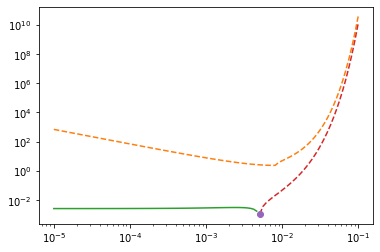

In [302]:
def mode_one(omega = 1,cs=60,hs=150,hw=100,kk=0.01):
    
    bs = np.sqrt(1 - (omega/cs/kk)**2 + 0j)
    t1 = + bs*np.exp(hs*kk)*np.exp(hs*bs*kk) 
    t2 = - bs*np.exp(hs*kk)*np.exp(hw*bs*kk) 
    t3 =    + bs*np.exp(hw*kk)*np.exp(hs*bs*kk) 
    t4 =    - bs*np.exp(hw*kk)*np.exp(hw*bs*kk) 
    t5 =    - np.exp(hs*kk)*np.exp(hs*bs*kk) 
    t6 =    - np.exp(hs*kk)*np.exp(hw*bs*kk) 
    t7 =    + np.exp(hw*kk)*np.exp(hs*bs*kk) 
    t8 =    + np.exp(hw*kk)*np.exp(hw*bs*kk)
    val = t1 + t2 + t3 + t4 + t5 + t6 + t7 + t8
    return val, [t1,t2,t3,t4,t5,t6,t7,t8,bs]

def mode_two(omega = 1,cs=100,hs=150,hw=100,kk=0.01):
    
    bs = np.sqrt(1 - (omega/cs/kk)**2 + 0j)

    t1 = + bs*np.exp(hs*kk)*np.exp(hs*bs*kk) 
    t2 = + bs*np.exp(hs*kk)*np.exp(hw*bs*kk) 
    t3 = - bs*np.exp(hw*kk)*np.exp(hs*bs*kk) 
    t4 = - bs*np.exp(hw*kk)*np.exp(hw*bs*kk) 
    t5 = - np.exp(hs*kk)*np.exp(hs*bs*kk) 
    t6 = + np.exp(hs*kk)*np.exp(hw*bs*kk) 
    t7 = - np.exp(hw*kk)*np.exp(hs*bs*kk) 
    t8 = + np.exp(hw*kk)*np.exp(hw*bs*kk)
    val = t1 + t2 + t3 + t4 + t5 + t6 + t7 + t8
    return val, [t1,t2,t3,t4,t5,t6,t7,t8,bs]

da1=[]
da2=[]

ks = np.logspace(-5,-1,100)
om = 0.5
for l in ks:
    v1,l1 = mode_one(kk=l,omega=om)
    v2,l2 = mode_two(kk=l,omega=om)
    da1.append(v1)
    da2.append(v2)
da1 = np.array(da1) 
da2 = np.array(da2) 

min_ind = np.argmin(np.abs(da2))

import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
plt.plot(ks[da1>0], np.abs(da1[da1>0]) )
plt.plot(ks[da1<0], np.abs(da1[da1<0]),'--' )
plt.plot(ks[da2>0], np.abs(da2[da2>0]) )
plt.plot(ks[da2<0], np.abs(da2[da2<0]),'--' )
plt.plot(ks[min_ind],np.abs(da2[min_ind]),'o')
plt.yscale('log')
plt.xscale('log')
print({om/ks[min_ind]})

(0.0, 1.5)

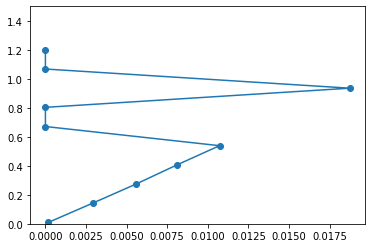

In [308]:
ksol=[]
oms = np.linspace(0.01,1.2,10)
ks = np.logspace(-5,-1,100)
for om in oms:
    da2=[]
    for l in ks:
        v2,l2 = mode_two(omega = om,
                         cs=50,
                         hs=150,
                         hw=100,
                         kk=l)
        da2.append(v2)
    da2 = np.array(da2) 
    min_ind = np.argmin(np.abs(da2))
    ksol.append(ks[min_ind])

fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
plt.plot(ksol,oms,'-o')
plt.ylim([0,1.5])

In [253]:
da=[]
ks = np.logspace(-10,-1,100)
for l in ks:
    omega = 1
    c = omega/l
    cs = 100
    cp = 1000
    cw = 1500
    bet_s = np.sqrt(1 - (c/cs)**2 + 0j)
    alph_s = np.sqrt(1 - (c/cp)**2 + 0j)
    alph_w = np.sqrt(1 - (c/cw)**2 + 0j)
    val = characteristic.subs(alpha_s,alph_s).subs(alpha_w,alph_w).subs(beta_s,bet_s)\
        .subs(H_w,100).subs(k,l).subs(H_s,150)
    da.append( complex(val) )

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


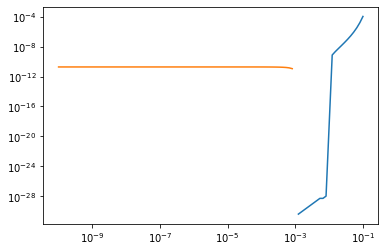

In [254]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
da = np.array(da)
plt.plot(ks[da>0], da[da>0] )
plt.plot(ks[da<0], -da[da<0] )
plt.yscale('log')
plt.xscale('log')

In [330]:
da=[]
ks = np.logspace(-5,-1,50)
for l in ks:
    omega = 1
    c = omega/l
    cs = 50
    cp = 2000
    cw = 1500
    bet_s = np.sqrt(1 - (c/cs)**2 + 0j)
    alph_s = np.sqrt(1 - (c/cp)**2 + 0j)
    alph_w = np.sqrt(1 - (c/cw)**2 + 0j)
    val = characteristic.subs(alpha_s,alph_s).subs(alpha_w,alph_w).subs(beta_s,bet_s)\
        .subs(H_w,100).subs(k,l).subs(H_s,150)
    da.append( complex(val) )
min_ind = np.argmin(np.abs(da))
print(ks[min_ind])

0.0005179474679231213


In [332]:
ksol=[]
ks = np.logspace(-10,-1,50)
omegas = np.linspace(0,1,10)
for omega in omegas:
    da=[]
    for l in ks:
        c = omega/l
        cs = 100
        cp = 1000
        cw = 1500
        bet_s = np.sqrt(1 - (c/cs)**2 + 0j)
        alph_s = np.sqrt(1 - (c/cp)**2 + 0j)
        alph_w = np.sqrt(1 - (c/cw)**2 + 0j)
        val = characteristic.subs(alpha_s,alph_s).subs(alpha_w,alph_w).subs(beta_s,bet_s)\
            .subs(H_w,100).subs(k,l).subs(H_s,150)
        da.append( complex(val) )
    min_ind = np.argmin(np.abs(da))
    ksol.append(ks[min_ind])

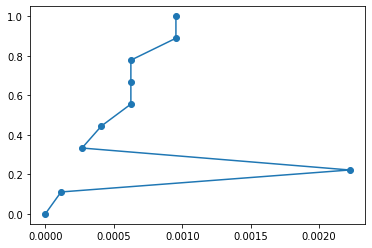

In [333]:
plt.plot(ksol,omegas,'-o')